# Rotating Coild Data Analysis for BO Corrector Magnets

## Import libraries and Load measurement data

In [1]:
import sys
import numpy as np
import matplotlib
matplotlib.use('Qt5Agg')

%matplotlib notebook

import matplotlib.pyplot as plt
from lnls.rotcoil import *

In [2]:
# Define serial numbers, one for each magnet

serials_ch = [
    # used corrected (sorted)
    '022', '021', '020', '037', '036', '040', '035', '034', '033', '039', # group2
    '013', '010', '016', '009', '012', '053', '054', '055', '049', '050', # group2
    '051', '056', '052', '017', '023', # group2
]

serials_cv = [
    # used corrected (sorted)
    '027', '062', '015', '060', '025', '024', '047', '041', '044', '026', # group2
    '019', '059', '011', '029', '058', '018', '014', '038', '048', '043', # group2
    '028', '057', '046', '045', '061', # group2
]

serials_unused = [
    '001', '002', '003', '004', '005', '006', '007', '008', # group1
    '030', '031', '032', '042', # group2
    '063', '064', '065', '066', '067', '068', '069', '070', '071', '072', # group3
    '073', '074', '075', '076', '077', # group3
    '078', # group4
    '079', '080', '081', '082', '083', '084' # group3
]

# group1: lower excitation average
# group2: stardard group
# group3: different residual normal quadrupole @ ~0A
# group4: different residual normal quadrupole @ - 0A and large rotation error at 1AD current


serials = sorted(serials_cv)

# Load all data
RotCoilMeas_BOCorH.family_folder = ''
data = MagnetsAnalysis(RotCoilMeas_BOCorH, serials)
data.init()

# Print info
data.print_info()


positive currents of monopolar power supply used generated field with opposite sign.
signs of all multipole values will be therefore inverted so as to generate default
excitation data tables: positive currents correspond to nominal focusing or defocusing field
properties.

index: 00, serial_number: 011, data sets: ['M1']
index: 01, serial_number: 014, data sets: ['M1']
index: 02, serial_number: 015, data sets: ['M1']
index: 03, serial_number: 018, data sets: ['M1']
index: 04, serial_number: 019, data sets: ['M1']
index: 05, serial_number: 024, data sets: ['M1']
index: 06, serial_number: 025, data sets: ['M1']
index: 07, serial_number: 026, data sets: ['M1']
index: 08, serial_number: 027, data sets: ['M1']
index: 09, serial_number: 028, data sets: ['M1']
index: 10, serial_number: 029, data sets: ['M1']
index: 11, serial_number: 038, data sets: ['M1']
index: 12, serial_number: 041, data sets: ['M1']
index: 13, serial_number: 043, data sets: ['M1']
index: 14, serial_number: 044, data set

## Maximum Integrated Quadrupole

In [3]:
# gets integrated strength at maximum current for all magnets
data.main_intmpole_at_max_current('M1')

index:00, serial:011, idx:06, max_current:    +9.9786 [A], diff_spec: +9.62 [%]
index:01, serial:014, idx:06, max_current:    +9.9785 [A], diff_spec: +9.47 [%]
index:02, serial:015, idx:06, max_current:    +9.9786 [A], diff_spec: +9.13 [%]
index:03, serial:018, idx:06, max_current:    +9.9778 [A], diff_spec: +9.42 [%]
index:04, serial:019, idx:06, max_current:    +9.9796 [A], diff_spec: +9.12 [%]
index:05, serial:024, idx:06, max_current:    +9.9804 [A], diff_spec: +9.36 [%]
index:06, serial:025, idx:06, max_current:    +9.9799 [A], diff_spec: +9.43 [%]
index:07, serial:026, idx:06, max_current:    +9.9793 [A], diff_spec: +9.15 [%]
index:08, serial:027, idx:06, max_current:    +9.9791 [A], diff_spec: +9.25 [%]
index:09, serial:028, idx:06, max_current:    +9.9791 [A], diff_spec: +9.30 [%]
index:10, serial:029, idx:06, max_current:    +9.9793 [A], diff_spec: +9.47 [%]
index:11, serial:038, idx:06, max_current:    +9.9790 [A], diff_spec: +9.30 [%]
index:12, serial:041, idx:06, max_curren

<IPython.core.display.Javascript object>


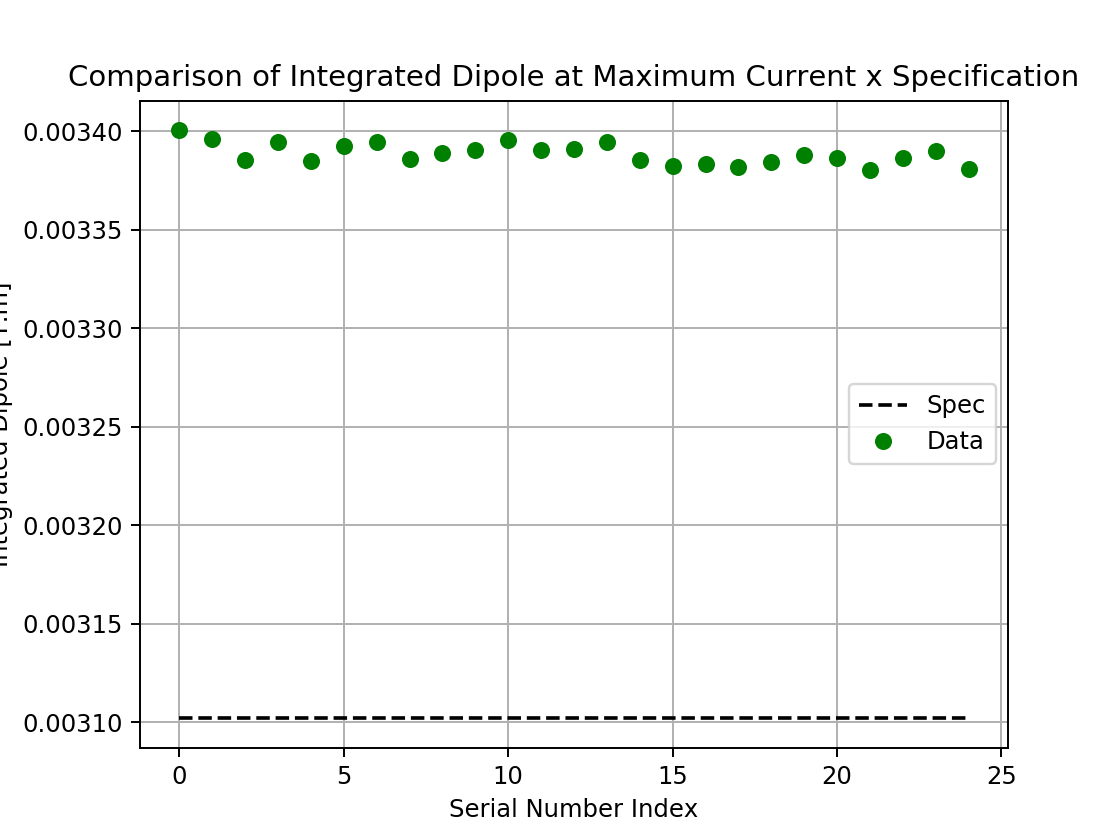

In [4]:
# plot data comparison with spec
plt.figure()
data.main_intmpole_at_max_current_plot(plt)
plt.show()

## Magnetic Center

<IPython.core.display.Javascript object>


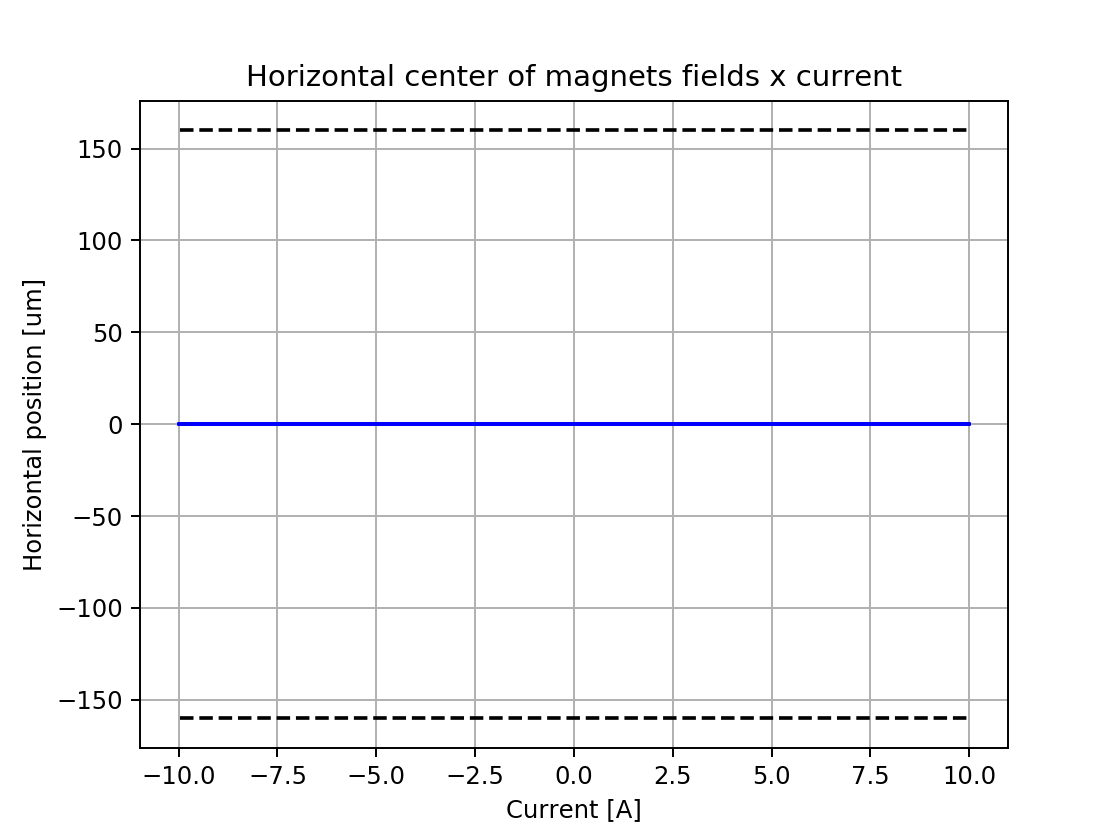

Horizontal center at maximum current [um]: +0.00 ± 0.00


<IPython.core.display.Javascript object>


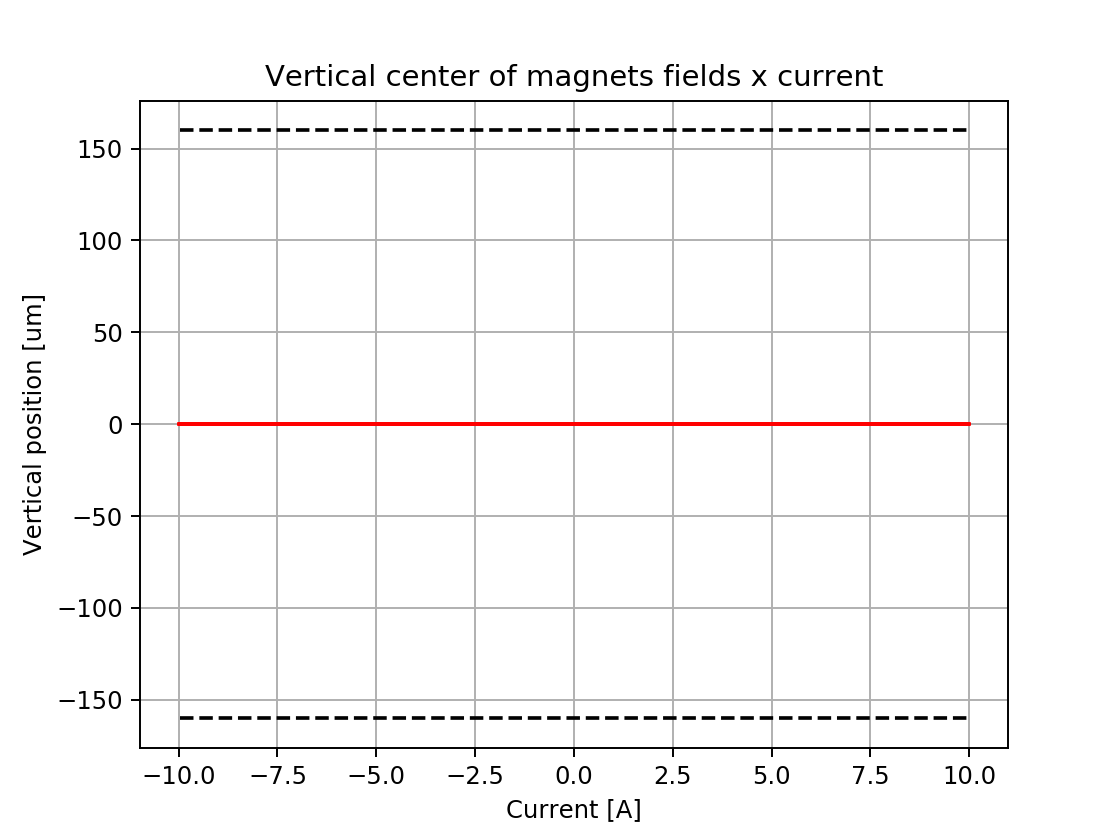

Vertical center at maximum current [um]: +0.00 ± 0.00


In [5]:
# Horizontal center for all magnets x currents
plt.figure()
data.magnetic_center_direction_plot('M1', 'X', plt)
plt.show()

# Vertical center for all magnets y currents
plt.figure()
data.magnetic_center_direction_plot('M1', 'Y', plt)
plt.show()

<IPython.core.display.Javascript object>


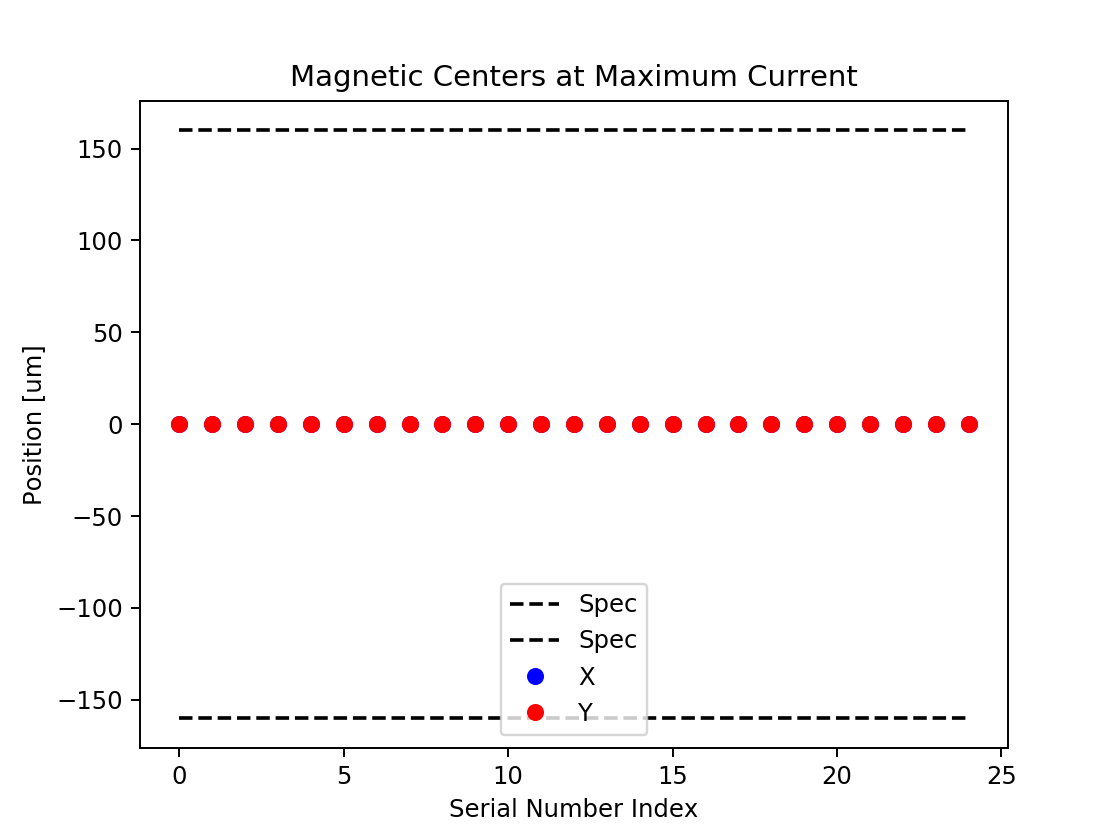

<IPython.core.display.Javascript object>


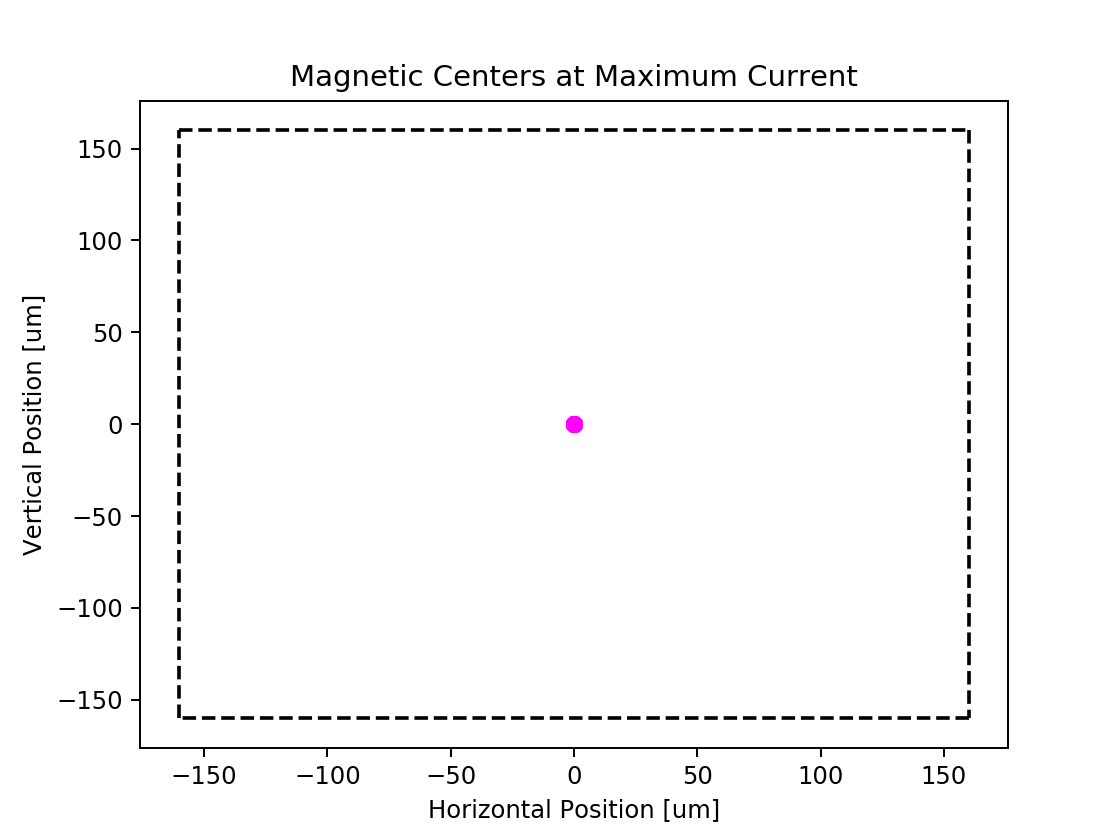

In [11]:
# Horizontal and vertical positions of all magnets
plt.figure()
data.magnetic_center_plot('M1', plt)
plt.show()

# Transverse plane positions
plt.figure()
data.magnetic_center_transverse_plot('M1', plt)
plt.show()

## Ramp Up

<IPython.core.display.Javascript object>


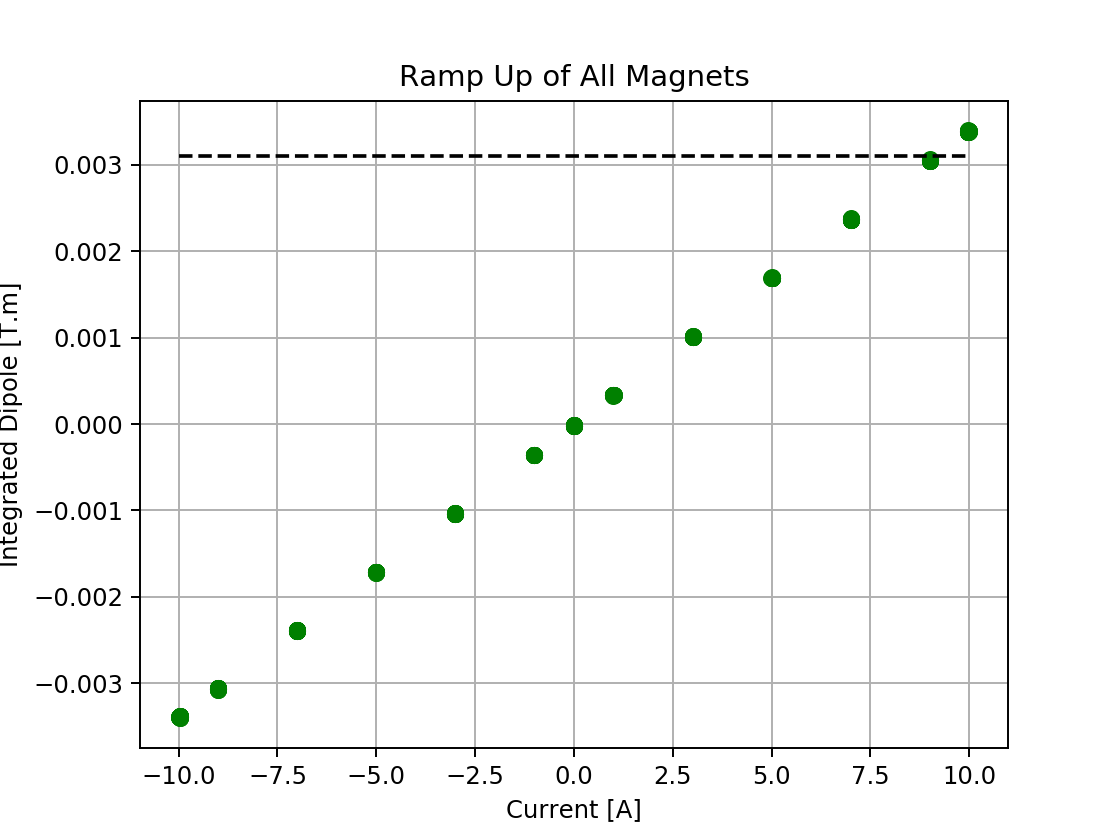

Nominal Integrated Dipole [T.m]:



In [6]:
# Plot rampup integrated strength of main multipole and compare it to nominal values and maximum spec

plt.figure()
data.rampup_excitation_curve_plot('M1', plt)
plt.show()

# Print currents for nominal strengths
print()
d = data.tmpl.get_nominal_main_intmpole_values(3.0)
for fam, gl in d.items():
    c = data.tmpl.rampup_main_mpole_2_curr('M1', gl)
    print('{:<15s}: {:05.1f} A'.format(fam, c))

<IPython.core.display.Javascript object>


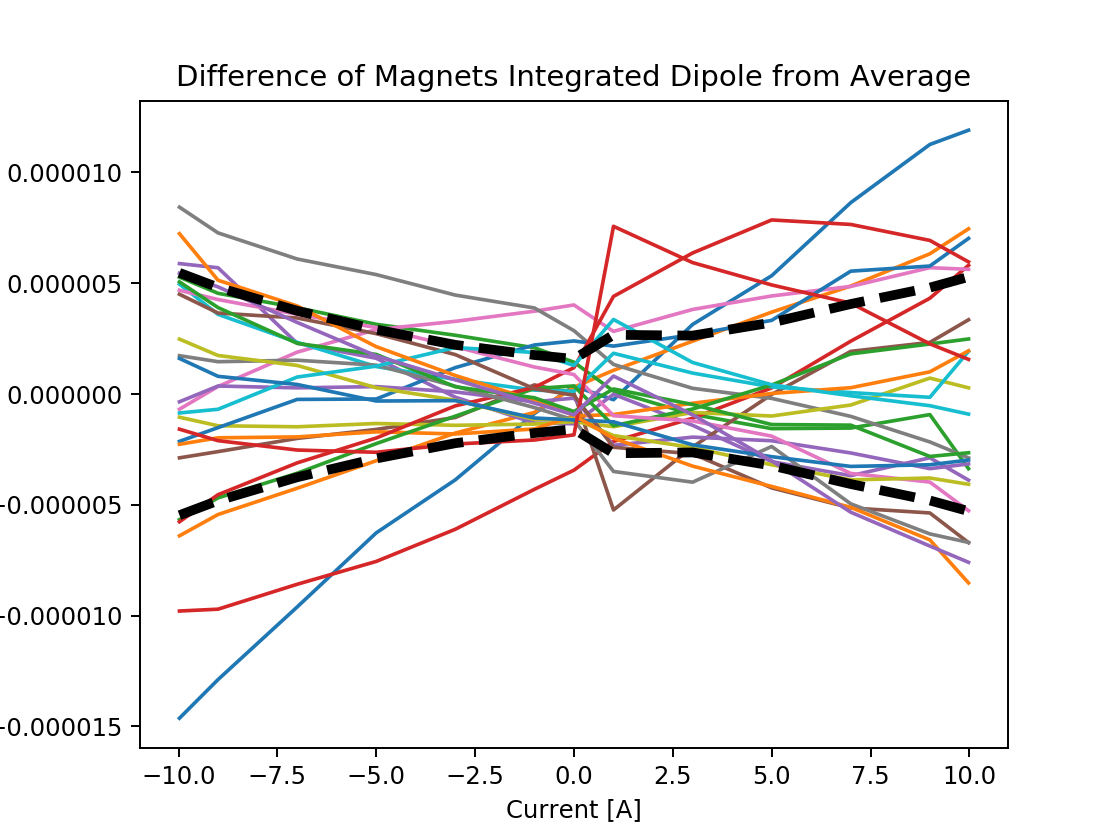

(25, 13)


In [7]:
# Plot rampup dispersion amongst magnets

plt.figure()
data.rampup_excitation_curve_dispersion_plot('M1', plt)
plt.show()

In [8]:
# Print random integrated main strength for various currents

data.rampup_excitation_curve_rms_error_print('M1')

current 00:   -9.977 [A], rms_error:  0.1613 [%], max_error:  0.4333 [%]
current 01:   -9.001 [A], rms_error:  0.1571 [%], max_error:  0.4186 [%]
current 02:   -7.000 [A], rms_error:  0.1571 [%], max_error:  0.4085 [%]
current 03:   -5.000 [A], rms_error:  0.1696 [%], max_error:  0.4277 [%]
current 04:   -3.000 [A], rms_error:  0.2141 [%], max_error:  0.5854 [%]
current 05:   -1.000 [A], rms_error:  0.4929 [%], max_error:  1.1912 [%]
current 06:   -0.000 [A], rms_error:  9.1565 [%], max_error: 23.7331 [%]
current 07:   +1.000 [A], rms_error:  0.7996 [%], max_error:  2.2688 [%]
current 08:   +3.000 [A], rms_error:  0.2612 [%], max_error:  0.6093 [%]
current 09:   +5.000 [A], rms_error:  0.1910 [%], max_error:  0.4455 [%]
current 10:   +7.000 [A], rms_error:  0.1714 [%], max_error:  0.3653 [%]
current 11:   +9.000 [A], rms_error:  0.1573 [%], max_error:  0.3697 [%]
current 12:   +9.979 [A], rms_error:  0.1560 [%], max_error:  0.3514 [%]


<IPython.core.display.Javascript object>


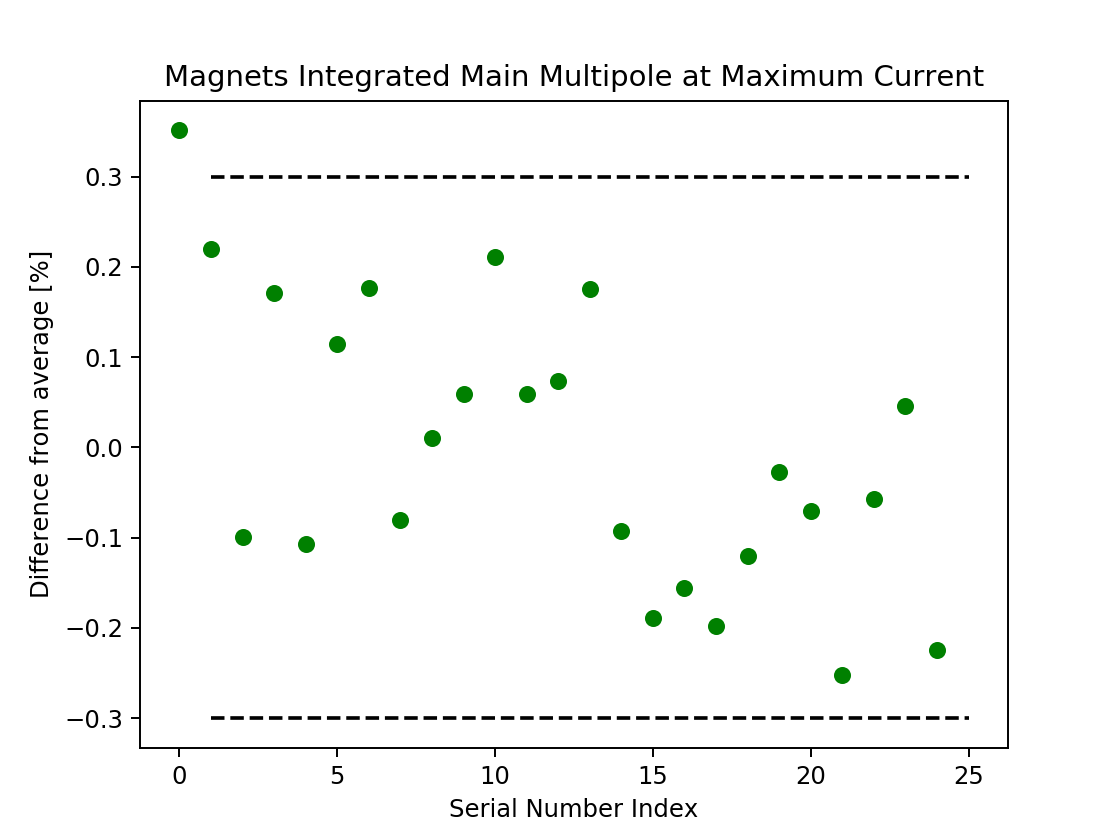

In [9]:
# Plot Integrated Quadrupole Error for maximum current

plt.figure()
data.rampup_excitation_curve_rms_error_plot(plt)
plt.show()

# Gradient Roll Error

<IPython.core.display.Javascript object>


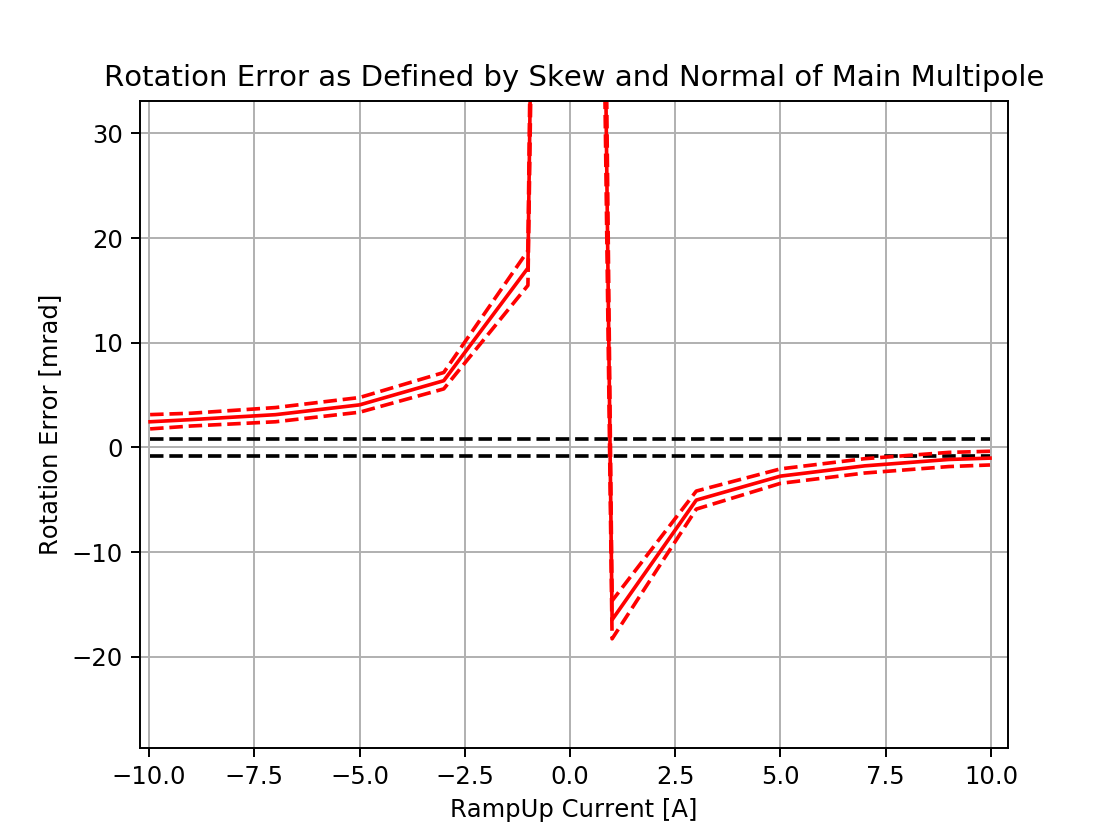

Currents for nominal strengths:


<IPython.core.display.Javascript object>


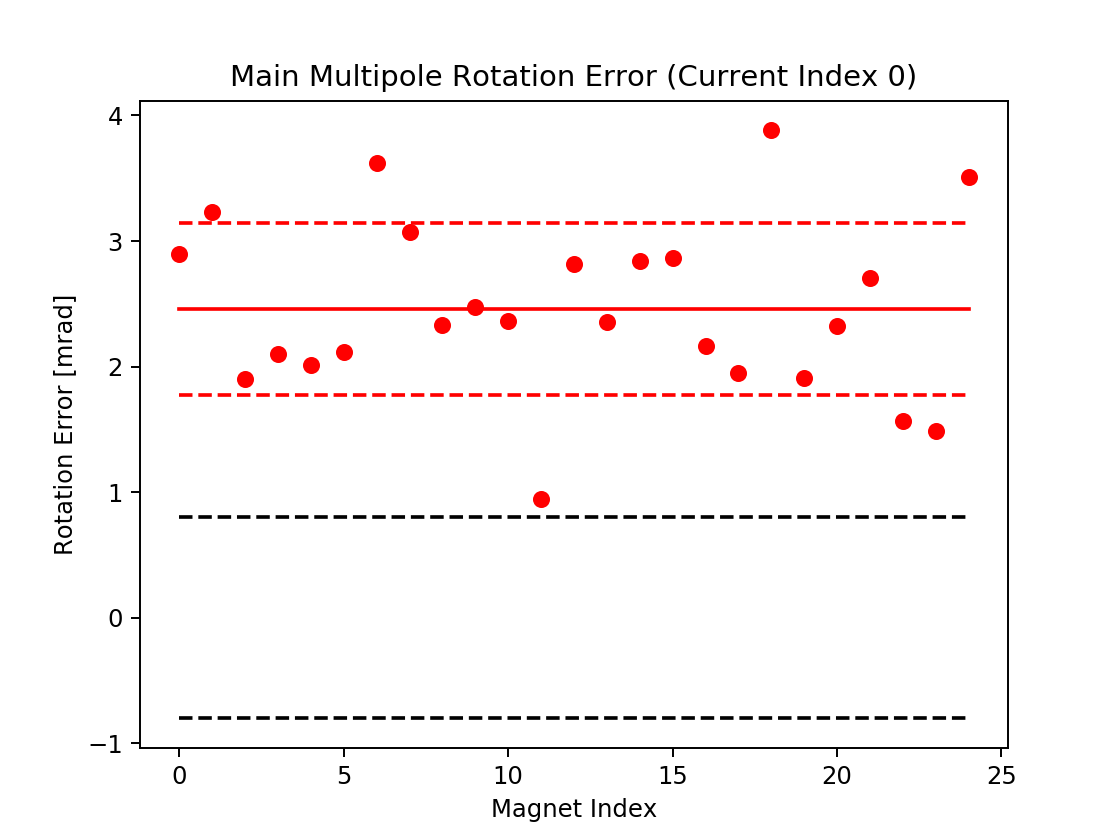

Angle error (Spec): +0.800 mrad
Angle error (Avg) : +2.458 mrad
Angle error (Std) : +0.682 mrad


<IPython.core.display.Javascript object>


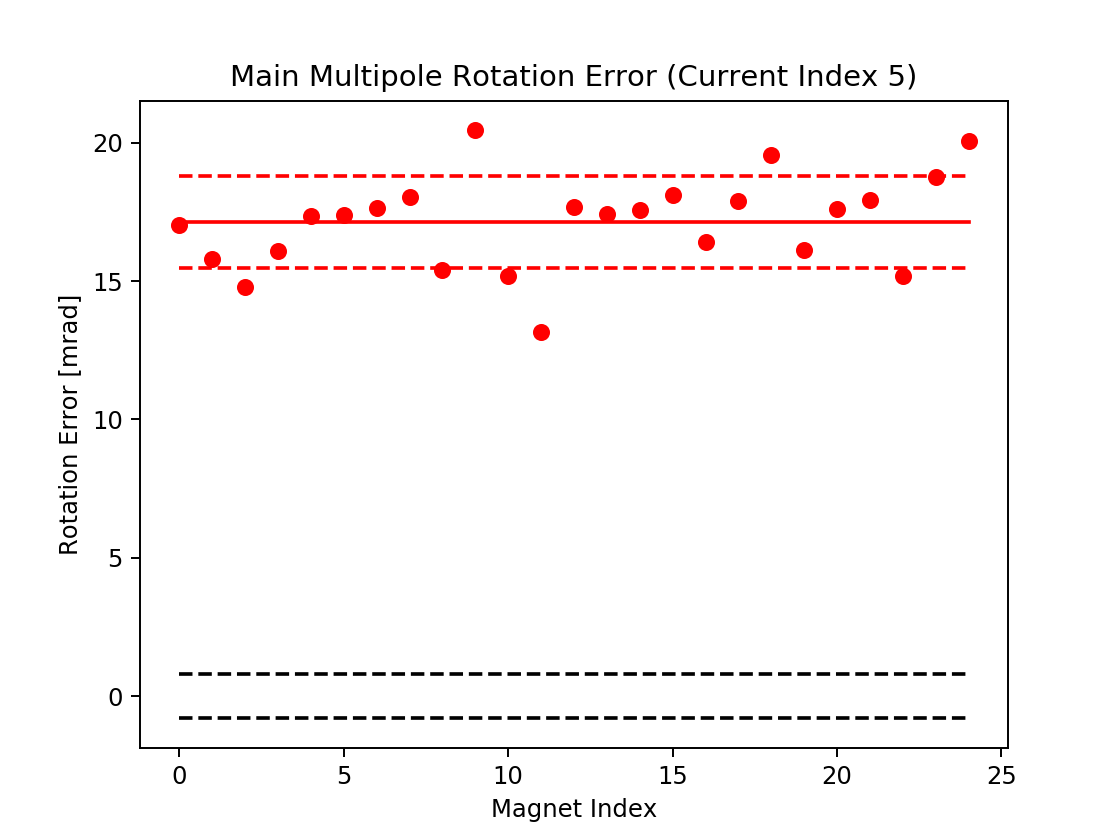

Angle error (Spec): +0.800 mrad
Angle error (Avg) : +17.146 mrad
Angle error (Std) : +1.656 mrad


<IPython.core.display.Javascript object>


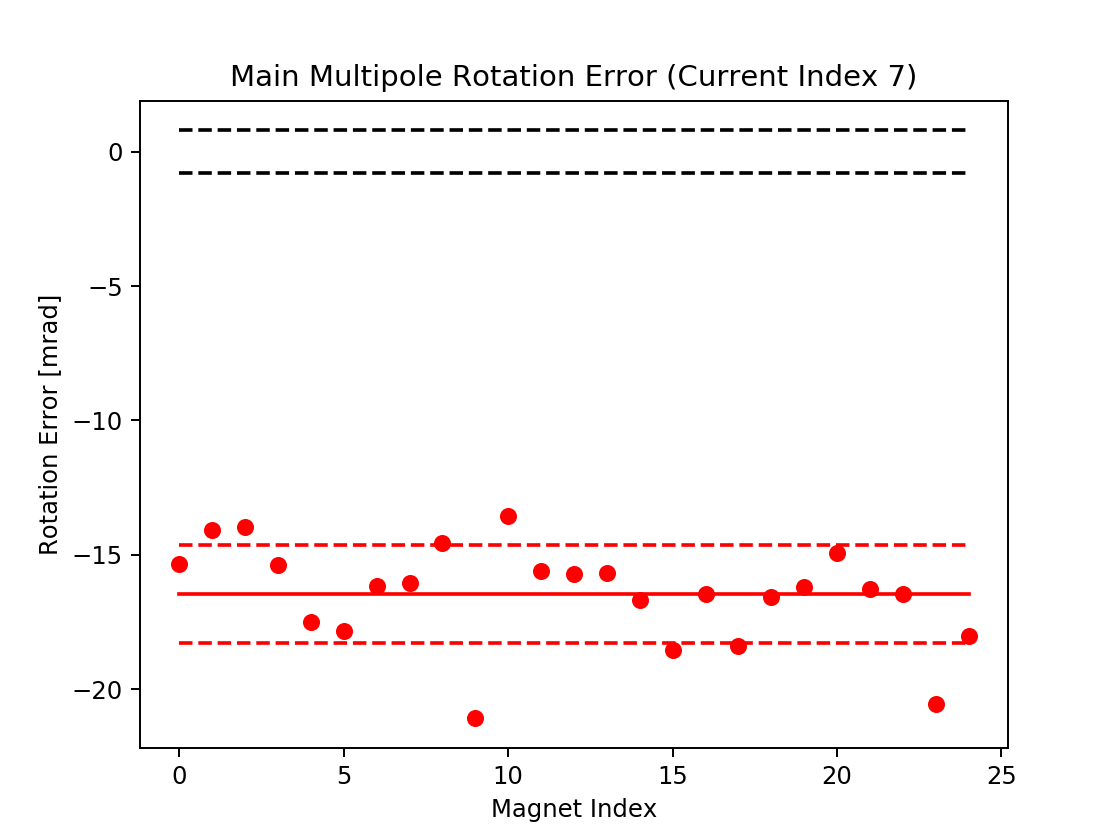

Angle error (Spec): +0.800 mrad
Angle error (Avg) : -16.461 mrad
Angle error (Std) : +1.816 mrad


<IPython.core.display.Javascript object>


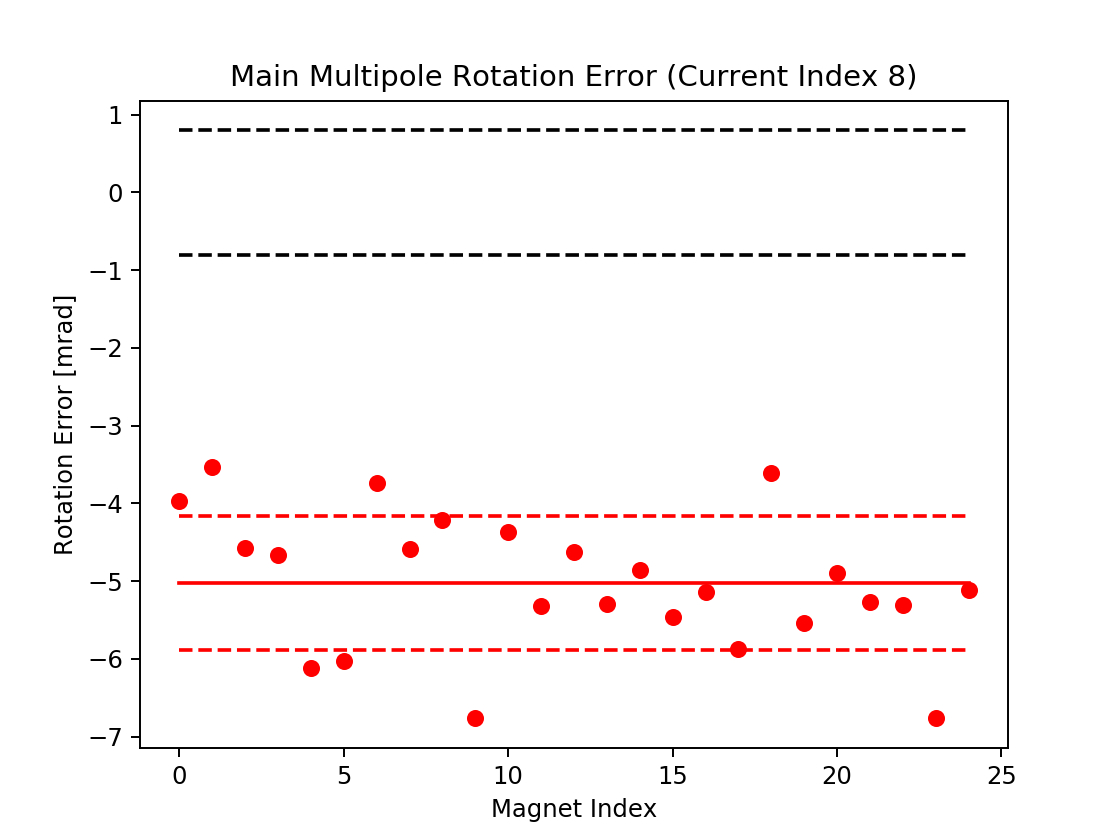

Angle error (Spec): +0.800 mrad
Angle error (Avg) : -5.025 mrad
Angle error (Std) : +0.862 mrad


<IPython.core.display.Javascript object>


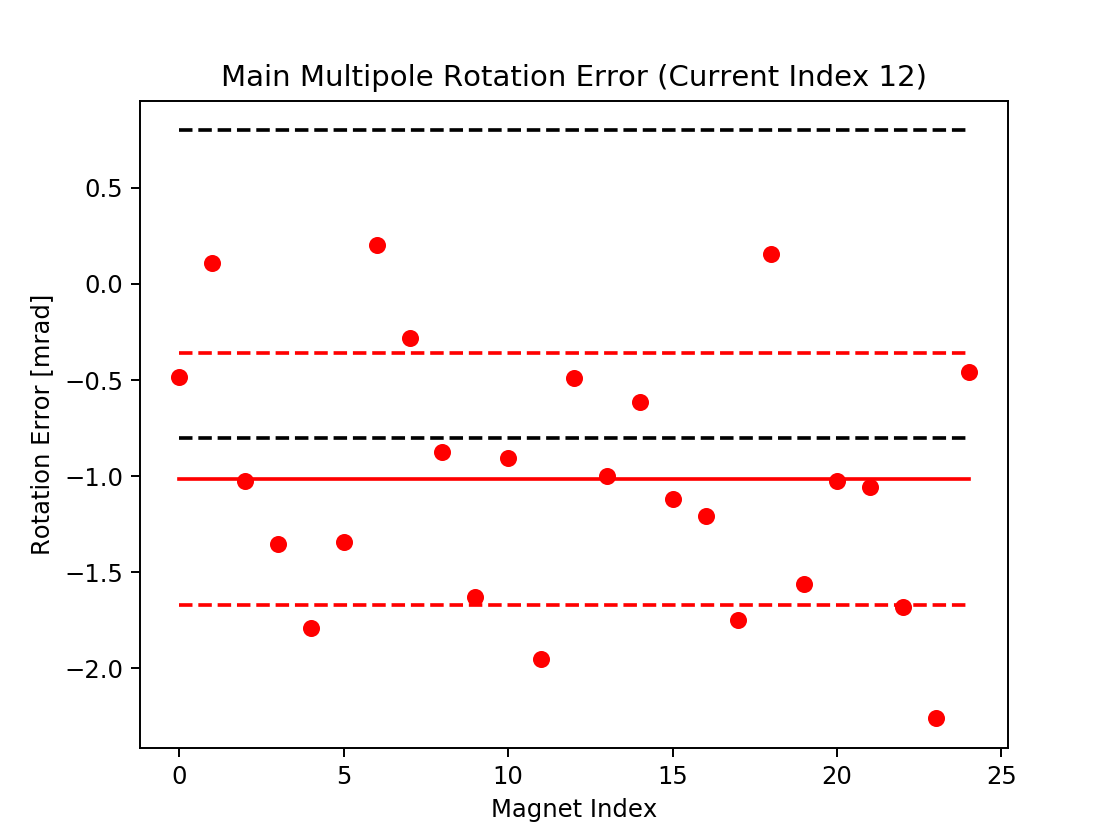

Angle error (Spec): +0.800 mrad
Angle error (Avg) : -1.016 mrad
Angle error (Std) : +0.654 mrad


In [16]:
plt.figure()
data.rotation_error_vs_current_plot('M1', 3.0, plt)
plt.show()

curr_idx = [0, 5, 7, 8, 12]  
for i in curr_idx:
    plt.figure()
    spec, avg, std = data.rotation_error_plot('M1', plt, i)
    plt.show()
    print('Angle error (Spec): {:+.3f} mrad'.format(spec))
    print('Angle error (Avg) : {:+.3f} mrad'.format(avg))
    print('Angle error (Std) : {:+.3f} mrad'.format(std))

## Hysteresis

<IPython.core.display.Javascript object>


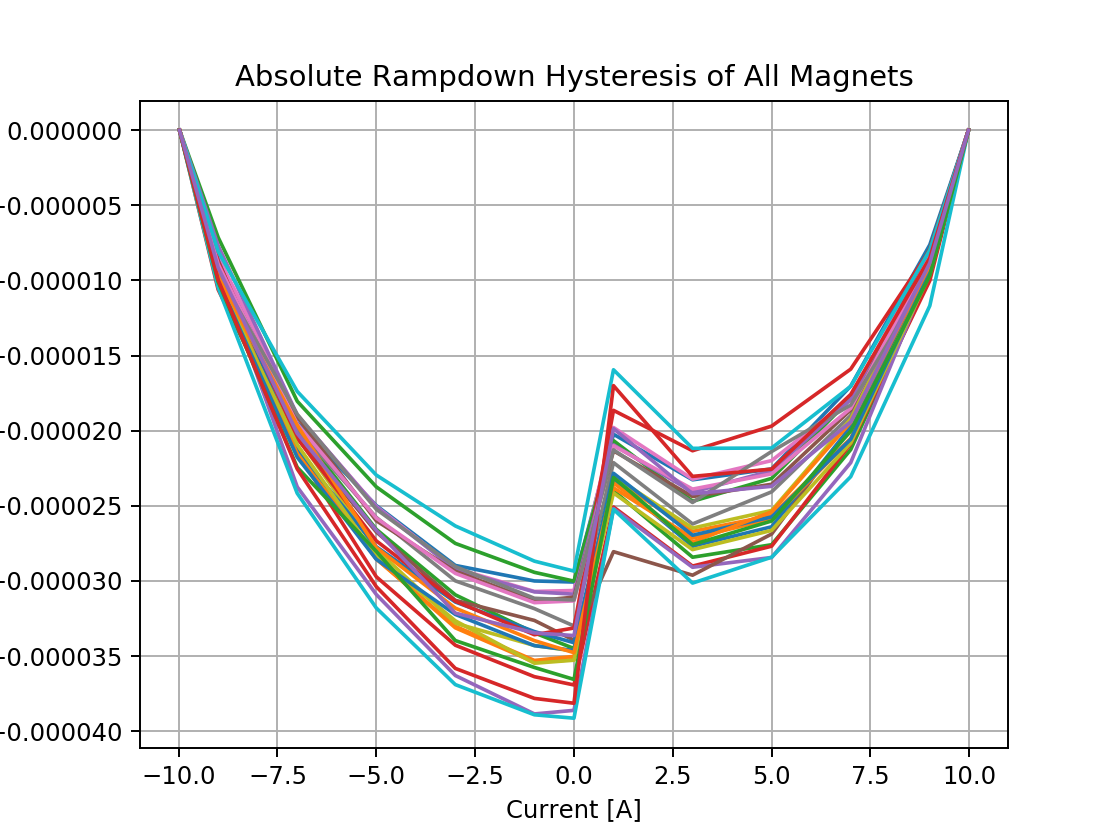

<IPython.core.display.Javascript object>


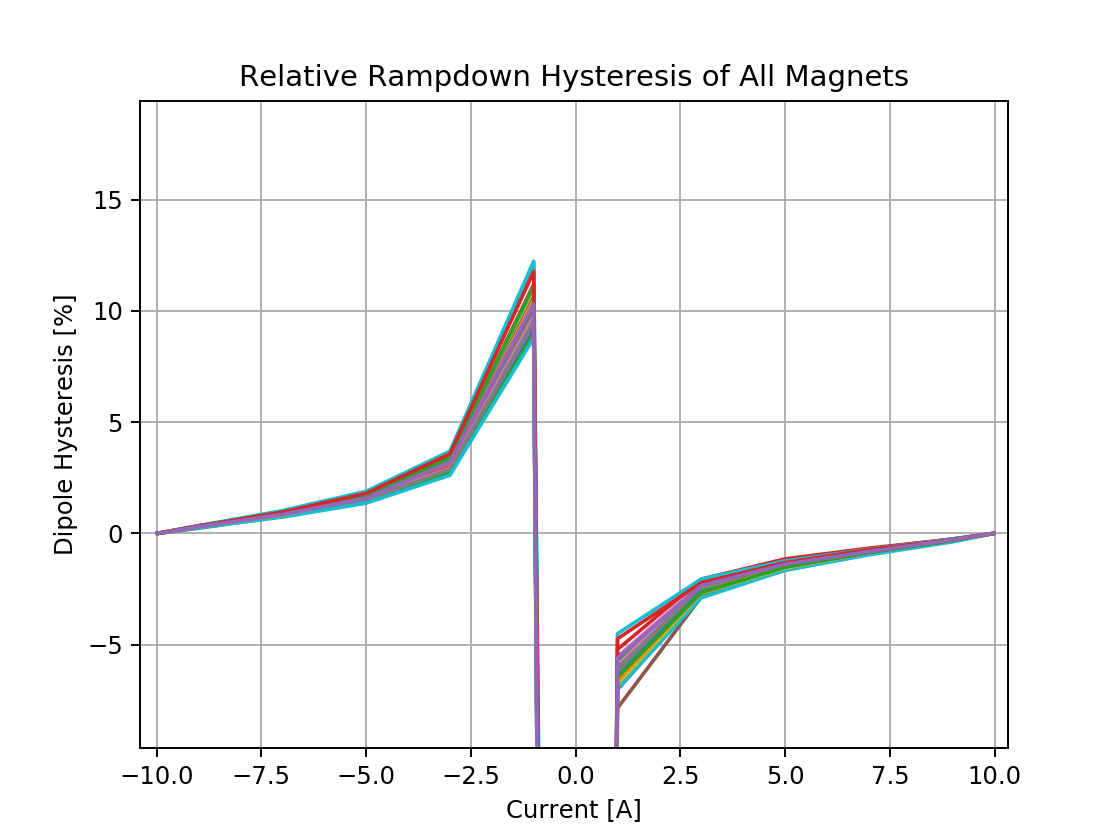

In [17]:
# Absolute
plt.figure()
data.hysteresis_absolute_plot('M1', plt)
plt.show()

# Relative
plt.figure()
data.hysteresis_relative_plot('M1', plt)
plt.show()

## Multipoles

<IPython.core.display.Javascript object>


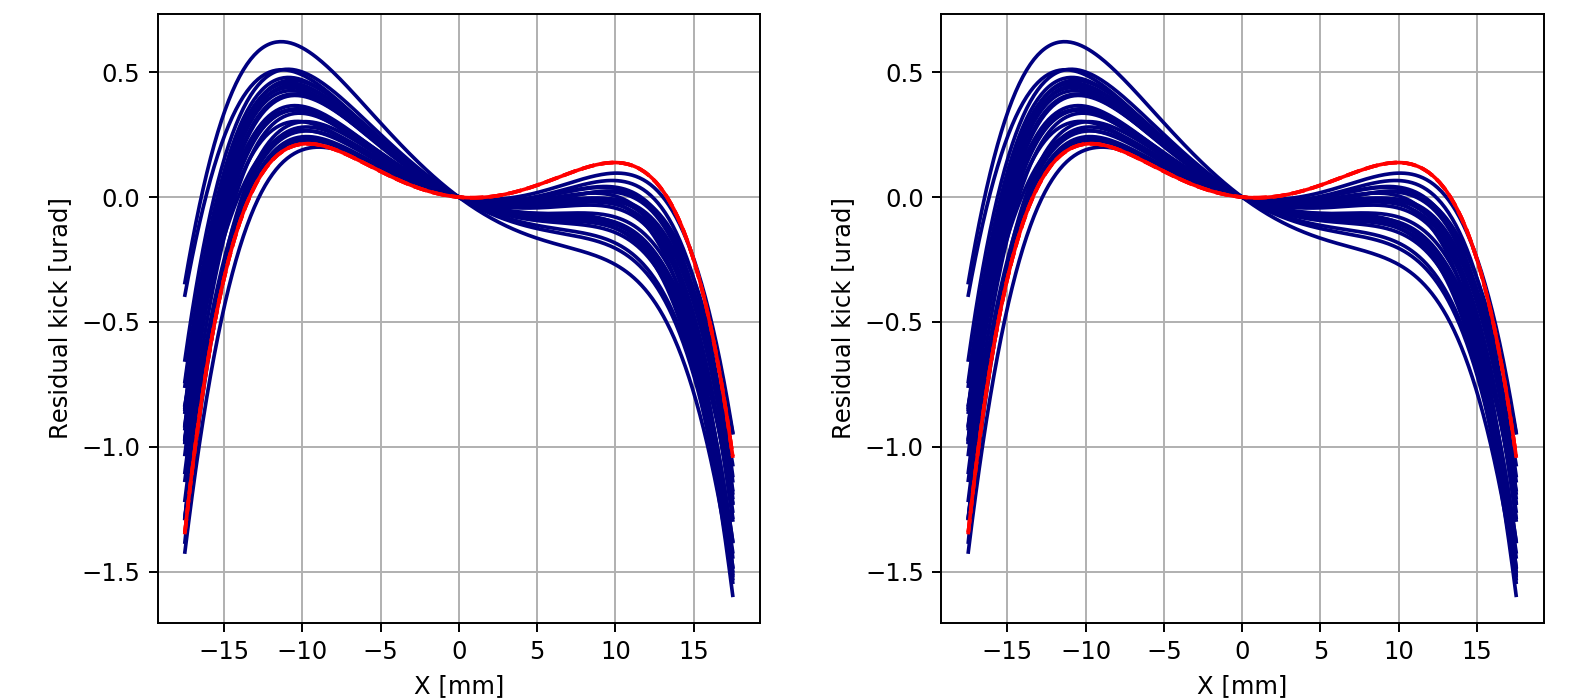

<IPython.core.display.Javascript object>


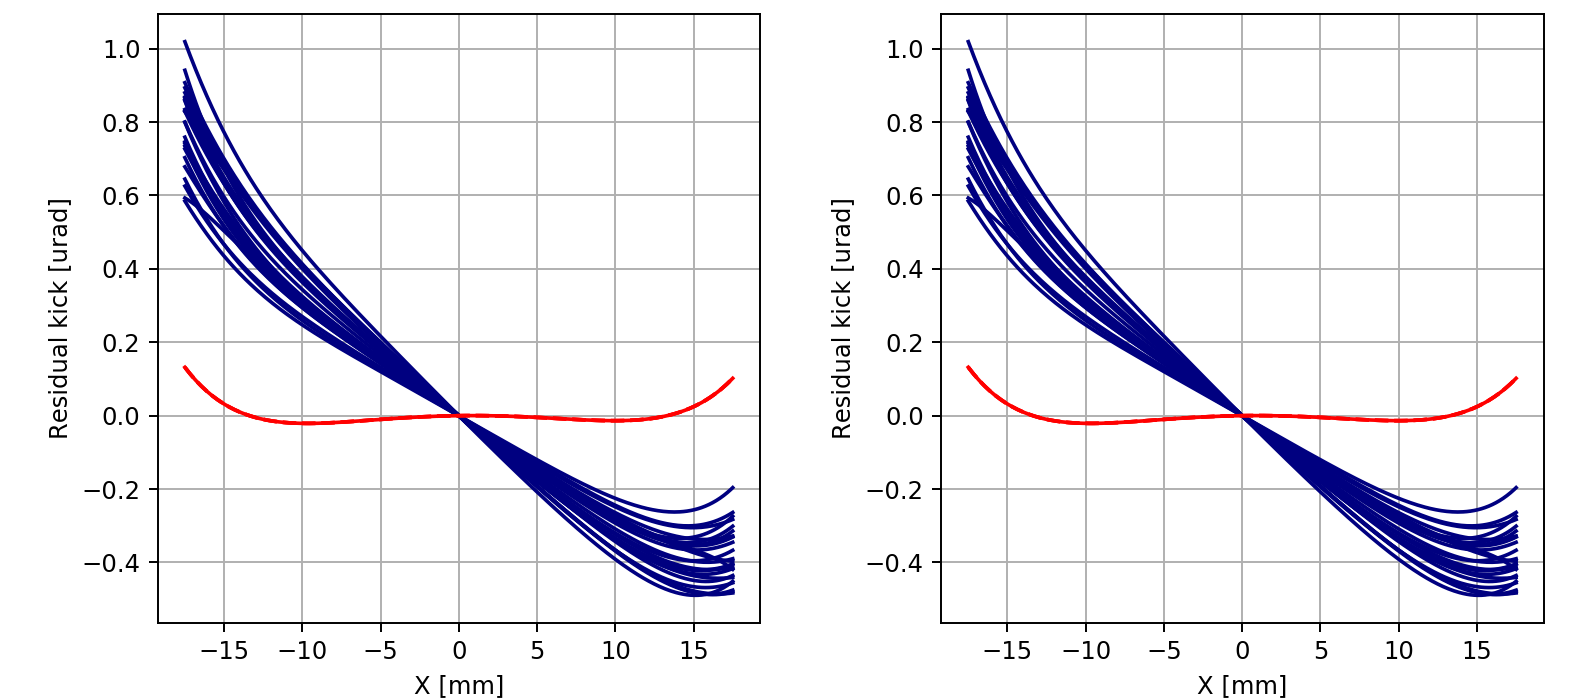

<IPython.core.display.Javascript object>


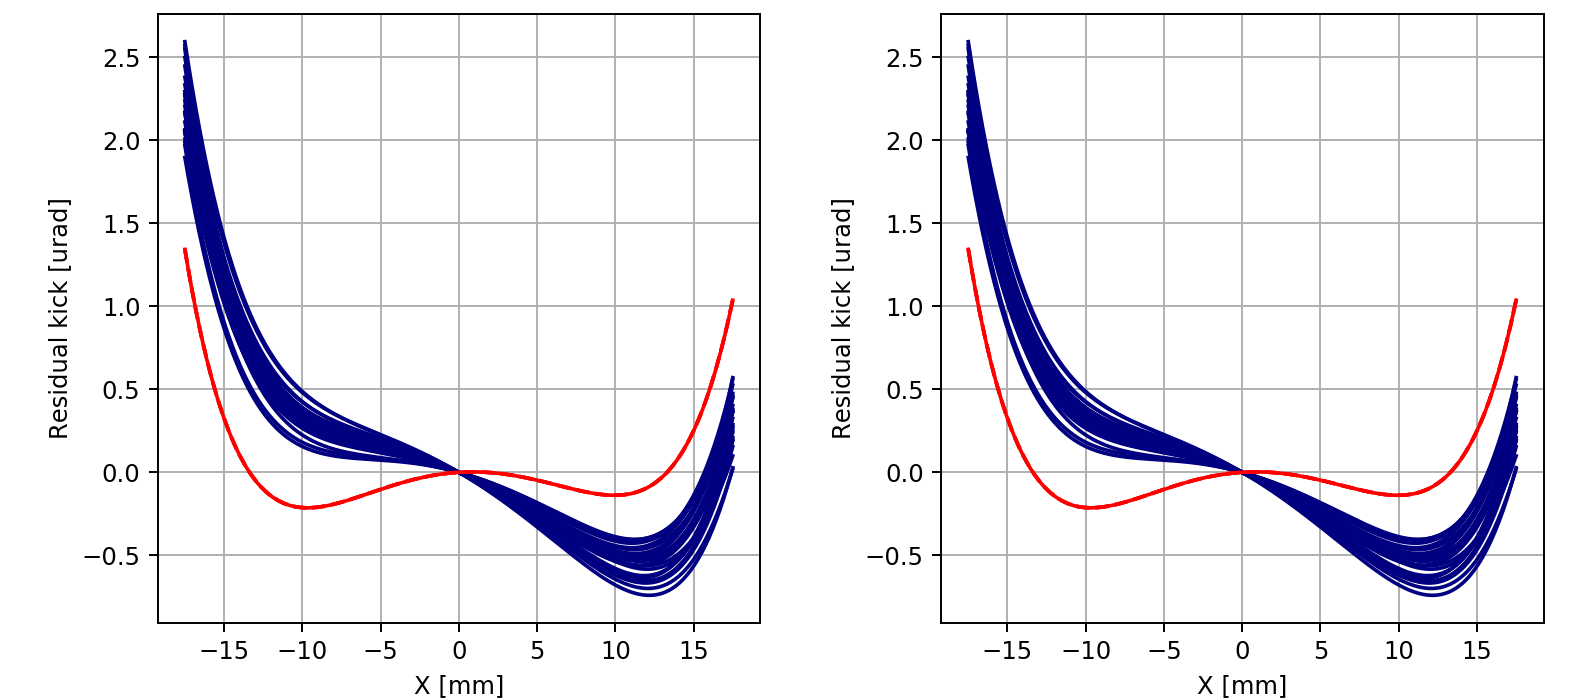

In [23]:
# Horizontal kick

curr_idx = [0, 7, 12]
for i in curr_idx:
    plt.figure(figsize=(9,4))
    data.multipole_errors_kickx_plot('M1', plt, curr_idx=i, energy=3.0, 
                                     excluded_monomials_plot1=(1,),
                                     excluded_monomials_plot2=(1,),)
    plt.show()

<IPython.core.display.Javascript object>


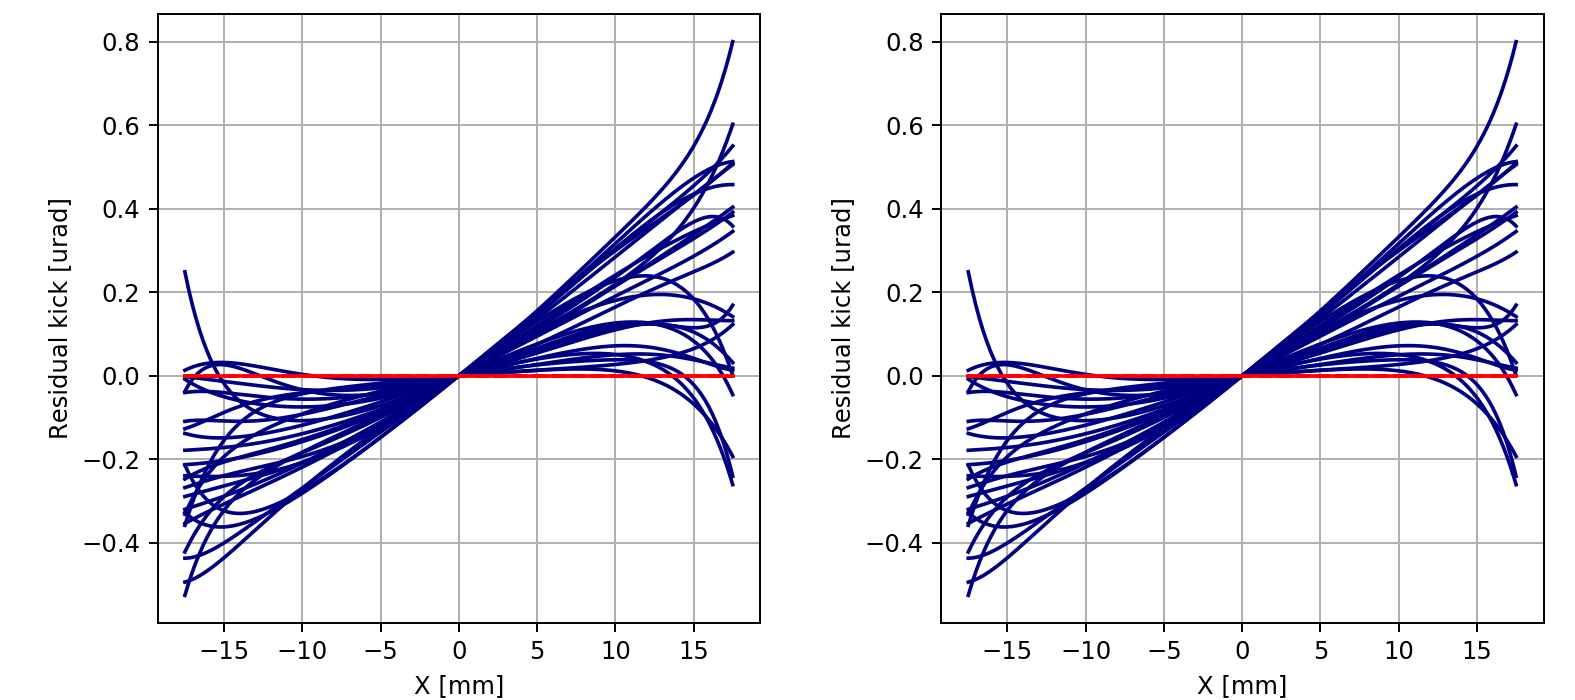

<IPython.core.display.Javascript object>


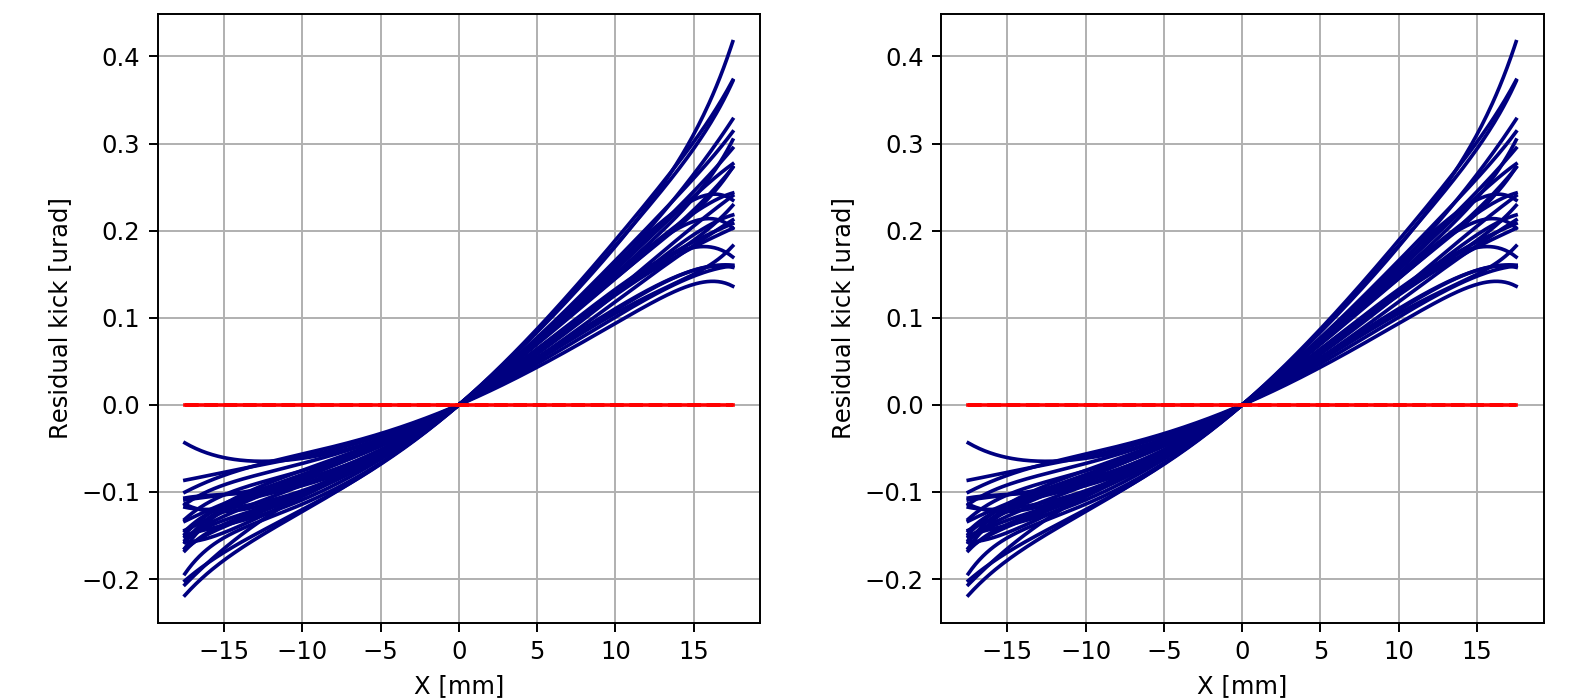

<IPython.core.display.Javascript object>


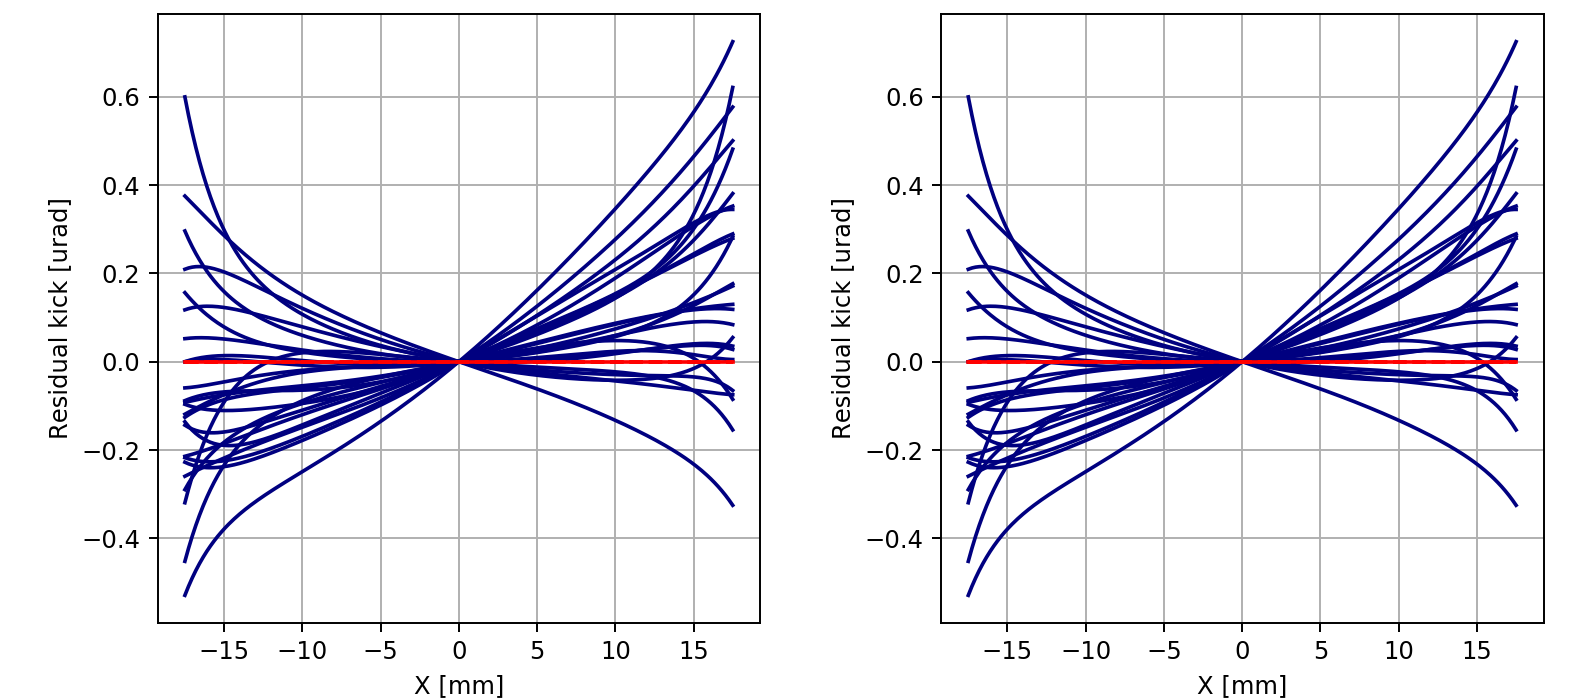

In [10]:
# Vertical kick

curr_idx = [0, 7, 12]
for i in curr_idx:
    plt.figure(figsize=(9,4))
    data.multipole_errors_kicky_plot('M1', plt, curr_idx=i, energy=3.0, 
                                     excluded_monomials_plot1=(1,),
                                     excluded_monomials_plot2=(1,))
    plt.show()

# Magnets Sorting

In [11]:
med = 'M1'
print('Rampup')
c, bl = data.tmpl.get_rampup(med)
for i in range(len(c)):
    print('{:02d}: I = {:8.4f} A => BL = {:+.4f} T'.format(i, c[i], bl[i]))

Rampup
00: I =  -9.9768 A => BL = -0.0034 T
01: I =  -9.0010 A => BL = -0.0031 T
02: I =  -7.0005 A => BL = -0.0024 T
03: I =  -5.0002 A => BL = -0.0017 T
04: I =  -3.0002 A => BL = -0.0010 T
05: I =  -1.0001 A => BL = -0.0004 T
06: I =  -0.0002 A => BL = -0.0000 T
07: I =   0.9999 A => BL = +0.0003 T
08: I =   2.9999 A => BL = +0.0010 T
09: I =   5.0008 A => BL = +0.0017 T
10: I =   7.0004 A => BL = +0.0024 T
11: I =   9.0005 A => BL = +0.0031 T
12: I =   9.9786 A => BL = +0.0034 T


In [12]:
# Print Multipoles Files

currents, _ = data.tmpl.get_rampup('M1')
stdout = sys.stdout
for cidx in range(0,len(currents)):
    sys.stdout = open('MULTIPOLES-CH_{:02d}_{:+.0f}A.txt'.format(cidx+1, currents[cidx]), 'w')
    data.readme_multipoles_print('M1', cidx)
    sys.stdout.flush()
sys.stdout = stdout